<a href="https://colab.research.google.com/github/Johnuyyala/Energy_prediction_model/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
# Reading dataset
df = pd.read_csv('/content/Energy.csv')
df.head()

,Household_ID,Region,Year,Energy_Consumed,Number_of_Appliances,Household_Size,Income_Level,Temperature,Electricity_Price,Energy_Bill
0,25e3424b-7d93-44f0-912c-16c8751f57db,South,2021,NaN,5,5.0,NaN,37,0.158443,135.862040
1,aceb0d91-c362-4554-b4ae-d7906dbc2d11,North,2016,536.0,7,4.0,NaN,21,0.315693,678.337113
2,1fae2354-9b01-4a49-af8b-c41c63045918,West,2024,NaN,9,3.0,Low,17,0.487080,792.869767
3,d2d1ebc3-a674-45df-b9bc-7b9f5362cf1c,South,2022,360.0,10,1.0,Low,10,0.249367,923.146549
4,752de06f-9ad5-468d-a4b4-d8ba6438c506,East,2010,823.0,2,4.0,Low,35,0.218306,110.572953


In [ ]:
# See the no. of rows and columns
df.shape

(1050, 10)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Household_ID', 'Region', 'Year', 'Energy_Consumed', 'Number_of_Appliances', 'Household_Size', 'Income_Level', 'Temperature', 'Electricity_Price', 'Energy_Bill']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Household_ID,object
Region,object
Year,int64
Energy_Consumed,float64
Number_of_Appliances,int64
Household_Size,float64
Income_Level,object
Temperature,int64
Electricity_Price,float64
Energy_Bill,float64


In [ ]:
df.describe()

,Year,Energy_Consumed,Number_of_Appliances,Household_Size,Temperature,Electricity_Price,Energy_Bill
count,1050.000000,962.000000,1050.000000,1030.000000,1050.000000,1050.000000,1050.000000
mean,2017.086667,793.905405,7.609524,3.040777,17.124762,0.299050,509.538822
std,4.247706,406.226807,4.046430,1.397724,12.866057,0.114707,282.441577
min,2010.000000,102.000000,1.000000,1.000000,-5.000000,0.101320,20.301409
25%,2013.000000,448.500000,4.000000,2.000000,6.000000,0.203202,258.001675
50%,2017.000000,786.000000,8.000000,3.000000,17.000000,0.298625,513.209478
75%,2020.000000,1160.750000,11.000000,4.000000,28.000000,0.398330,749.765583
max,2024.000000,1499.000000,14.000000,5.000000,39.000000,0.499978,999.530251


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Household_ID          1050 non-null   object 
 1   Region                1050 non-null   object 
 2   Year                  1050 non-null   int64  
 3   Energy_Consumed       962 non-null    float64
 4   Number_of_Appliances  1050 non-null   int64  
 5   Household_Size        1030 non-null   float64
 6   Income_Level          932 non-null    object 
 7   Temperature           1050 non-null   int64  
 8   Electricity_Price     1050 non-null   float64
 9   Energy_Bill           1050 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 82.2+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Household_ID,0
Region,0
Year,0
Energy_Consumed,88
Number_of_Appliances,0
Household_Size,20
Income_Level,118
Temperature,0
Electricity_Price,0
Energy_Bill,0


In [ ]:
# Remove unwanted columns
df.drop(columns=['Household_ID'], inplace=True)  # specify the columns to remove

In [ ]:
df


,Region,Year,Energy_Consumed,Number_of_Appliances,Household_Size,Income_Level,Temperature,Electricity_Price,Energy_Bill
0,South,2021,NaN,5,5.0,NaN,37,0.158443,135.862040
1,North,2016,536.0,7,4.0,NaN,21,0.315693,678.337113
2,West,2024,NaN,9,3.0,Low,17,0.487080,792.869767
3,South,2022,360.0,10,1.0,Low,10,0.249367,923.146549
4,East,2010,823.0,2,4.0,Low,35,0.218306,110.572953
...,...,...,...,...,...,...,...,...,...
1045,South,2011,691.0,14,1.0,High,19,0.492559,297.757020
1046,East,2021,1146.0,11,5.0,NaN,15,0.363141,562.028298
1047,West,2012,939.0,13,2.0,Low,18,0.435188,569.664385
1048,North,2012,344.0,12,2.0,High,11,0.229372,120.952455


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Region,0
Year,0
Energy_Consumed,0
Number_of_Appliances,0
Household_Size,0
Income_Level,0
Temperature,0
Electricity_Price,0
Energy_Bill,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df


,Region,Year,Energy_Consumed,Number_of_Appliances,Household_Size,Income_Level,Temperature,Electricity_Price,Energy_Bill
0,2,0.785714,0.495279,0.307692,1.00,2,0.954545,0.143288,0.118012
1,1,0.428571,0.310666,0.461538,0.75,2,0.590909,0.537738,0.671994
2,3,1.000000,0.495279,0.615385,0.50,1,0.500000,0.967649,0.788956
3,2,0.857143,0.184681,0.692308,0.00,1,0.340909,0.371364,0.921996
4,0,0.000000,0.516106,0.076923,0.75,1,0.909091,0.293450,0.092186
...,...,...,...,...,...,...,...,...,...
1045,2,0.071429,0.421618,1.000000,0.00,0,0.545455,0.981392,0.283341
1046,0,0.785714,0.747316,0.769231,1.00,2,0.454545,0.656756,0.553218
1047,3,0.142857,0.599141,0.923077,0.25,1,0.522727,0.837481,0.561016
1048,1,0.142857,0.173228,0.846154,0.25,0,0.363636,0.321207,0.102786


In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
df[num_columns]


,Year,Energy_Consumed,Number_of_Appliances,Household_Size,Temperature,Electricity_Price,Energy_Bill
0,0.785714,0.495279,0.307692,1.00,0.954545,0.143288,0.118012
1,0.428571,0.310666,0.461538,0.75,0.590909,0.537738,0.671994
2,1.000000,0.495279,0.615385,0.50,0.500000,0.967649,0.788956
3,0.857143,0.184681,0.692308,0.00,0.340909,0.371364,0.921996
4,0.000000,0.516106,0.076923,0.75,0.909091,0.293450,0.092186
...,...,...,...,...,...,...,...
1045,0.071429,0.421618,1.000000,0.00,0.545455,0.981392,0.283341
1046,0.785714,0.747316,0.769231,1.00,0.454545,0.656756,0.553218
1047,0.142857,0.599141,0.923077,0.25,0.522727,0.837481,0.561016
1048,0.142857,0.173228,0.846154,0.25,0.363636,0.321207,0.102786


In [ ]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Energy_Consumed', axis=1)  # -- independent variable
y = df['Energy_Consumed'] # -- dependent variable

In [ ]:
y

,Energy_Consumed
0,0.495279
1,0.310666
2,0.495279
3,0.184681
4,0.516106
...,...
1045,0.421618
1046,0.747316
1047,0.599141
1048,0.173228


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [ ]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07520668000251222
Mean Absolute Error: 0.2280417754350517
R-squared: -0.02122819264779552


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.07841925545618635
Mean Absolute Error: 0.23355340041954215
R-squared: -0.06485161312308718


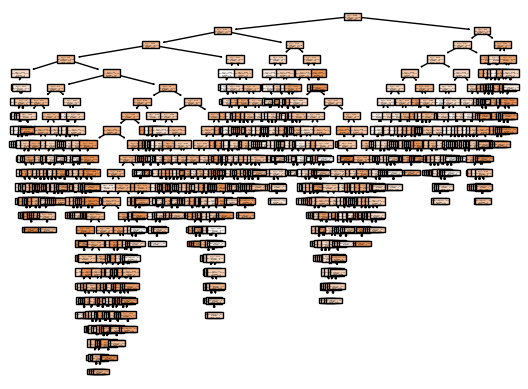

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
